# Naive - Bayes // Binary Joint Use Case (Single DataFrameCase) 

In this vignette a use case of the Binary Channel Entropy Triangle is presented. We are going to evaluate different multiclass-classification scenarios in order to analyze the data.
The main functionalities for the classification of the database will be extracted from: https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

### Importing Libraries

As the functions for the entopies measures are stored in other domain, first we will need to access those modules with the functions and the import all the necessary functions

In [1]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory

In [2]:
from entropytriangle import * #importing all modules necessary for the plotting

## Download the databases

In [3]:
#df = pd.read_csv('Arthritis.csv',delimiter=',',index_col='Unnamed: 0').drop(['ID'],axis = 1)
df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
#df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null object
dtypes: float64(1), int64(8), object(1)
memory usage: 60.1+ KB


In [5]:
df = df.fillna(0)
df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,5,1,1,1,2,1.0,3,1,1,benign
2,5,4,4,5,7,10.0,3,2,1,benign
3,3,1,1,1,2,2.0,3,1,1,benign
4,6,8,8,1,3,4.0,3,7,1,benign
5,4,1,1,3,2,1.0,3,1,1,benign


### Prepare the data for the classification (Features - Classes) 

We are going to load the train_test_split that will allow us to separe automatically the data in a train/test sets. Additionally, we are going to import the contingency matrix that will allow us to calculate the joint entropy matrix of the classifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Separating the data farmes features and classes

In [7]:
X = df[df.columns[df.columns != 'Class']]
y = df['Class']

We are now to define some classificators for evaluating their performance with the BreastCancer database

In [8]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Naive Bayes

### Naive Bayes - Classifier 

All the steps showed in the CBET - BinaryJointCase at the Naives Bayes Region. Now we are using a loop for plotting all the values on the same diagram

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
edf = jentropies_binary(cm)

Iterations for varying the train size for checking the performance. We are going to vary the train set size

In [12]:
l = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.8]
names_l = list(str('Train size = '+ str(l[i])) for i in range(len(l)))
lis = list()
for i in range(len(l)):
    # dividing X, y into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = l[i], random_state = 0)
    gnb = GaussianNB().fit(X_train, y_train)
    gnb_predictions = gnb.predict(X_test)
    cm = confusion_matrix(y_test, gnb_predictions)
    edf = jentropies_binary(cm)
    lis.append(edf.iloc[[2]])

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


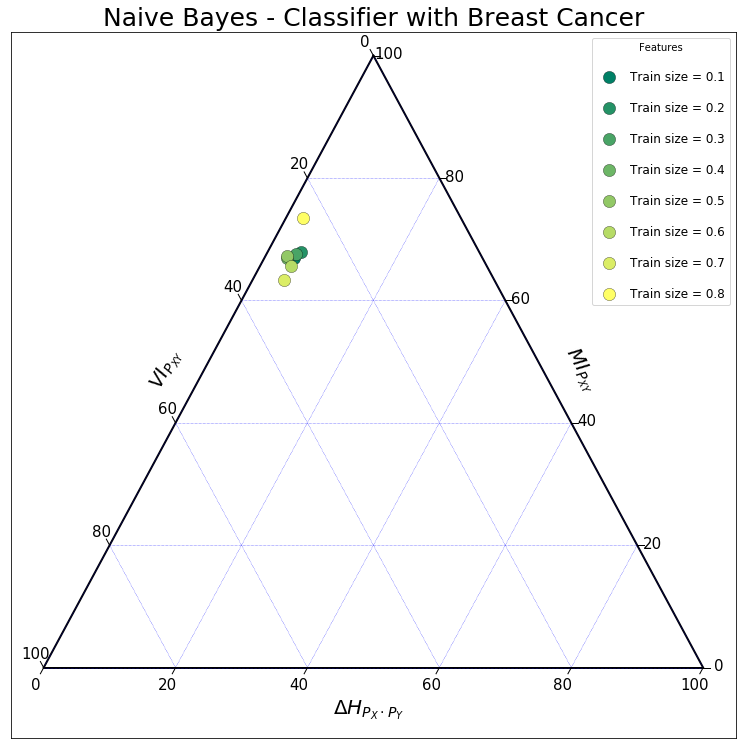

In [13]:
entriangle_list(lis,names=names_l,s_mk=150, gridl = 20, pltscale=13 ,fonts = 20, ticks_size= 15,chart_title="Naive Bayes - Classifier with Breast Cancer")